# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [2]:
import numpy as np
from matplotlib import pyplot as pl

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn import metrics as me

%matplotlib inline

## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Split the training set into a training set and a validation set
X_val = X_train[0:10000,:,:]
X_train = X_train[10000:,:,:]
y_val = y_train[0:10000]
y_train = y_train[10000:]

# Reshape the training data tensors so that each image is a vector
X_train = X_train.reshape(50000, 784)
X_val = X_val.reshape(10000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Scale the training data so that pixel intensity lies in [0,1]
X_train /= 255
X_val /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_val.shape[0], 'validation samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = tf.keras.utils.to_categorical(y_train, n_classes)
Y_val = tf.keras.utils.to_categorical(y_val, n_classes)
Y_test = tf.keras.utils.to_categorical(y_test, n_classes)

50000 train samples
10000 validation samples
10000 test samples


Create the MLP

In [5]:
model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238510 (931.68 KB)
Trainable params: 238510 (931.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Define some constants and train the MLP. In order to perform the model selection process, you train each model with the train dataset and evaluate it with the validation dataset. The test set remains unseen.

In [11]:
batch_size = 128
n_epoch = 15

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_val, Y_val))

Epoch 1/15
391/391 [==============================] - 3s 5ms/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 0.0819 - val_accuracy: 0.9791
Epoch 2/15
391/391 [==============================] - 2s 5ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.0783 - val_accuracy: 0.9787
Epoch 3/15
391/391 [==============================] - 2s 5ms/step - loss: 0.0086 - accuracy: 0.9979 - val_loss: 0.0766 - val_accuracy: 0.9795
Epoch 4/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.0841 - val_accuracy: 0.9794
Epoch 5/15
391/391 [==============================] - 2s 5ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0809 - val_accuracy: 0.9793
Epoch 6/15
391/391 [==============================] - 3s 6ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0799 - val_accuracy: 0.9814
Epoch 7/15
391/391 [==============================] - 2s 6ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.0795 - val_accuracy: 0.9803
Epoch 

Show the performance of the model. By observing the performance of your models on the validation set, you will choose a set of hyperparameters for your final model. The test set is still not used at this point.

Validation score: 0.08742210268974304
Validation accuracy: 0.9810000061988831


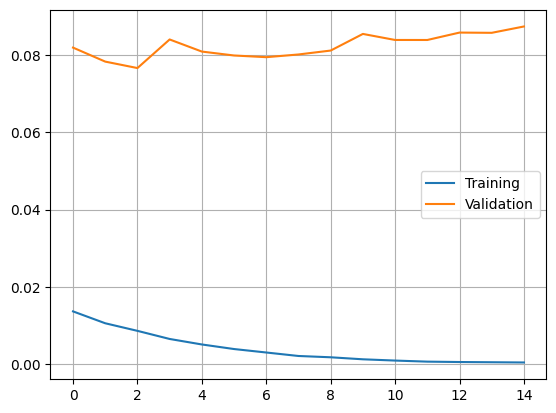

In [12]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Validation')
pl.legend()
pl.grid()

score = model.evaluate(X_val, Y_val, verbose=0)
print('Validation score:', score[0])
print('Validation accuracy:', score[1])

Now that you have chosen your final model, you can finally evaluate its performance using the test set. It is important that the test set remains hidden for your model until this last step in order to have an unbiased estimate of the performance. Therefore, you should not run the following cell until you have chosen your final model.

In [13]:
final_score = model.evaluate(X_test, Y_test, verbose=0)
print('FINAL RESULTS:')
print('Test score:', final_score[0])
print('Test accuracy:', final_score[1])

FINAL RESULTS:
Test score: 0.0828145295381546
Test accuracy: 0.980400025844574


Confusion matrix

In [14]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

313/313 [==============================] - 1s 2ms/step


array([[ 974,    1,    1,    0,    1,    0,    0,    1,    1,    1],
       [   0, 1125,    3,    1,    0,    1,    2,    1,    2,    0],
       [   5,    3, 1002,    6,    2,    0,    3,    6,    5,    0],
       [   0,    0,    5,  989,    0,    2,    0,    3,    2,    9],
       [   0,    0,    1,    1,  965,    0,    5,    2,    0,    8],
       [   2,    0,    0,    7,    1,  870,    5,    1,    4,    2],
       [   5,    2,    2,    1,    3,    5,  940,    0,    0,    0],
       [   1,    2,    7,    1,    0,    0,    0, 1008,    4,    5],
       [   3,    1,    2,    3,    4,    3,    3,    3,  947,    5],
       [   1,    2,    0,    4,    9,    2,    1,    3,    3,  984]],
      dtype=int64)